In [4]:
import pandas as pd

In [6]:
df = pd.read_csv('Hotel Reviews.csv')
data = pd.read_csv('Hotel Reviews.csv')

In [7]:
df.head(5)

address categories      city country   latitude  longitude  \
0  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
1  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
2  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
3  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
4  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   

                 name postalCode province          reviews.date  \
0  Hotel Russo Palace      30126       GA  2013-09-22T00:00:00Z   
1  Hotel Russo Palace      30126       GA  2015-04-03T00:00:00Z   
2  Hotel Russo Palace      30126       GA  2014-05-13T00:00:00Z   
3  Hotel Russo Palace      30126       GA  2013-10-27T00:00:00Z   
4  Hotel Russo Palace      30126       GA  2015-03-05T00:00:00Z   

      reviews.dateAdded  reviews.doRecommend  reviews.id  reviews.rating  \
0  2016-10-24T00:00:25Z                  NaN         NaN             4.0   
1  2016-10-24T00:00:25Z                  NaN         NaN             5.0   
2  2016-10-24T00:00:25Z                  NaN         NaN             5.0   
3  2016-10-24T00:00:25Z                  NaN         NaN             5.0   
4  2016-10-24T00:00:25Z                  NaN         NaN             5.0   

                                        reviews.text  \
0  Pleasant 10 min walk along the sea front to th...   
1  Really lovely hotel. Stayed on the very top fl...   
2  Ett mycket bra hotell. Det som drog ner betyge...   
3  We stayed here for four nights in October. The...   
4  We stayed here for four nights in October. The...   

                        reviews.title reviews.userCity reviews.username  \
0  Good location away from the crouds              NaN      Russ (kent)   
1      Great hotel with Jacuzzi bath!              NaN       A Traveler   
2                         Lugnt l��ge              NaN             Maud   
3          Good location on the Lido.              NaN            Julie   
4              ������ ���������������              NaN         sungchul   

  reviews.userProvince  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN

In [8]:
df.shape

(35912, 19)

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35912 entries, 0 to 35911
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   address               35912 non-null  object 
 1   categories            35912 non-null  object 
 2   city                  35912 non-null  object 
 3   country               35912 non-null  object 
 4   latitude              35826 non-null  float64
 5   longitude             35826 non-null  float64
 6   name                  35912 non-null  object 
 7   postalCode            35857 non-null  object 
 8   province              35912 non-null  object 
 9   reviews.date          35653 non-null  object 
 10  reviews.dateAdded     35912 non-null  object 
 11  reviews.doRecommend   0 non-null      float64
 12  reviews.id            0 non-null      float64
 13  reviews.rating        35050 non-null  float64
 14  reviews.text          35888 non-null  object 
 15  reviews.title      

In [15]:
print(df.isnull().sum())

address                     0
categories                  0
city                        0
country                     0
latitude                   86
longitude                  86
name                        0
postalCode                 55
province                    0
reviews.date              259
reviews.dateAdded           0
reviews.doRecommend     35912
reviews.id              35912
reviews.rating            862
reviews.text               24
reviews.title            1626
reviews.userCity        19649
reviews.username           43
reviews.userProvince    18394
dtype: int64


In [16]:
print(df.dtypes)

address                  object
categories               object
city                     object
country                  object
latitude                float64
longitude               float64
name                     object
postalCode               object
province                 object
reviews.date             object
reviews.dateAdded        object
reviews.doRecommend     float64
reviews.id              float64
reviews.rating          float64
reviews.text             object
reviews.title            object
reviews.userCity         object
reviews.username         object
reviews.userProvince     object
dtype: object


In [17]:
print(df.duplicated().sum())


4


### **Datatype Conversion:**

In [18]:
#convert  reviews.date  and reviews.dateAdded from object to datetime64
df['reviews.date'] = pd.to_datetime(df['reviews.date'], utc=True).dt.tz_localize(None)

df['reviews.dateAdded'] = pd.to_datetime(df['reviews.dateAdded'], utc=True).dt.tz_localize(None)


##**Data Preprocessing:**

### Missing Values

In [19]:
# handling missing values for latitude and Longitude

lat_nulls= df[df['latitude'].isnull()]
lat_nulls['name'].value_counts()

name
Hyatt Dulles                              32
The Inn @ St. Botolph                     26
Sonoma Coast Villa Spa                    10
Holiday Inn Express Howe (sturgis, Mi)     3
Hotel Olcott                               2
Palomar Washington Dc, A Kimpton Hotel     2
Dead Broke Inn                             1
The Miner's Inn Motel Restaurant           1
Leakey Springs Cabins                      1
Alyssa's Motel                             1
Saco River Recreational Council            1
Ubaa Old Crawford Inn                      1
Mountaintop Lodge Bed Breakfast            1
La Quinta                                  1
Americana Resort Properties                1
Busy B Ranch                               1
Motel 6                                    1
Name: count, dtype: int64

In [20]:
import time
from geopy.geocoders import Nominatim
import pandas as pd

# Initialize geolocator
geolocator = Nominatim(user_agent="hotel_geocoder")

# Example hotel names
hotels = lat_nulls['address']

# Function to get latitude and longitude with delay
def get_coordinates(hotel_name):
    try:
        # Introduce a delay between requests (e.g., 1 second)
        time.sleep(1)  # sleep for 1 second
        location = geolocator.geocode(hotel_name)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error for {hotel_name}: {e}")
        return None, None

# Apply the geocoding function with delay
lat_nulls["latitude"], lat_nulls["longitude"] = zip(*[get_coordinates(hotel) for hotel in hotels])




ModuleNotFoundError: No module named 'geopy'

In [21]:
lat_nulls['latitude'].isnull().sum()

86

In [14]:
df["latitude"] = df["latitude"].combine_first(lat_nulls["latitude"])
df["longitude"] = df["longitude"].combine_first(lat_nulls["longitude"])

In [15]:
df.dropna(subset=['latitude','longitude'],inplace=True)

### Label creation:


In [16]:
df['is_bad_review'] = df['reviews.rating'].apply(lambda x: 1 if x < 5.0 else 0)


### Data Cleaning with textual Data

In [17]:
text_df= df[['reviews.text', 'is_bad_review']]

In [18]:
text_df

reviews.text  is_bad_review
0      Pleasant 10 min walk along the sea front to th...              1
1      Really lovely hotel. Stayed on the very top fl...              0
2      Ett mycket bra hotell. Det som drog ner betyge...              0
3      We stayed here for four nights in October. The...              0
4      We stayed here for four nights in October. The...              0
...                                                  ...            ...
35907  Best of the Best!!!! My family and I stayed in...              0
35908  Amazing Vacation in Beautiful Cabin We stayed ...              0
35909  My husband and I stayed at Tree Tops which is ...              0
35910  to share your opinion of this businesswith YP ...              1
35911         xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx              1

[35826 rows x 2 columns]

In [19]:
#Inorder to perfrm preprocessing on reviews column , we need to remove the null values present in the reviews.text column
text_df['reviews.text'].isnull().sum()


24

In [20]:
text_df.dropna(subset=['reviews.text'],inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6764\1749113645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df.dropna(subset=['reviews.text'],inplace=True)


In [21]:
import spacy

# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

def preprocess_text_spacy(text):
    # Lowercase and process text using SpaCy pipeline
    doc = nlp(text.lower())

    # Tokenize and filter tokens
    tokens = [
        token.text for token in doc
        if not token.is_punct          # Remove punctuation
        and not token.is_digit         # Remove numbers
        and not token.is_stop          # Remove stopwords
        and token.text.strip() != ''   # Remove empty tokens
    ]

    # Join tokens back to a single string
    processed_text = ' '.join(tokens)

    return processed_text

# Apply the function to the DataFrame column
text_df['reviews.text'] = text_df['reviews.text'].apply(preprocess_text_spacy)


ModuleNotFoundError: No module named 'spacy'

In [22]:
text_df['reviews.text'].iloc[1]

"Really lovely hotel. Stayed on the very top floor and were surprised by a Jacuzzi bath we didn't know we were getting! Staff were friendly and helpful and the included breakfast was great! Great location and great value for money. Didn't want to leave!"

### Feature Engineering

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)  # Only consider words that appear in at least 10 documents
tfidf_matrix = vectorizer.fit_transform(text_df['reviews.text'])

# Convert the TF-IDF matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Add the TF-IDF columns to the original DataFrame
text_df = pd.concat([text_df, tfidf_df], axis=1)



ModuleNotFoundError: No module named 'sklearn'

In [24]:
text_df.isnull().sum()

reviews.text     0
is_bad_review    0
dtype: int64

In [25]:
text_df.dropna(inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6764\1907966544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df.dropna(inplace=True)


***Applying DOC2Vec model***

In [ ]:
pip install gensim


In [ ]:
#pip install gensim
from gensim.models.doc2vec import TaggedDocument

# Example: Assuming reviews is a list of raw review texts

# Create TaggedDocument objects
tokenized_reviews= text_df['reviews.text']
tagged_reviews = [TaggedDocument(words=words, tags=[str(i)]) for i, words in enumerate(tokenized_reviews)]


In [ ]:
from gensim.models import Doc2Vec

# Initialize and train the model
model = Doc2Vec(vector_size=5, # Size of the document vector
                window=5,         # Context window size
                min_count=2,      # Ignores words with total frequency lower than this
                workers=4,        # Number of threads
                epochs=20)        # Number of training epochs

# Build vocabulary
model.build_vocab(tagged_reviews)

# Train the model
model.train(tagged_reviews, total_examples=model.corpus_count, epochs=model.epochs)


In [ ]:
# Get vectors for the training documents
document_vectors = [model.dv[str(i)] for i in range(len(text_df['reviews.text']))]

# Example: Use vector for a specific reviewie
specific_vector = model.dv['0']  # Vector for the first review

df2 = pd.DataFrame(document_vectors)

In [ ]:
df2 = df2.rename(columns={0: "doc2vec_vector_0",
                          1: "doc2vec_vector_1",
                          2: "doc2vec_vector_2",
                          3: "doc2vec_vector_3",
                          4: "doc2vec_vector_4"})


In [ ]:
df2

doc2vec_vector_0  doc2vec_vector_1  doc2vec_vector_2  doc2vec_vector_3  \
0              0.073456         -0.464176         -0.111588         -0.000059   
1              0.103135         -0.583448         -0.103346         -0.058231   
2              0.217433         -0.360625         -0.119856          0.169932   
3             -0.102712          0.028435         -0.418196         -0.176185   
4              0.084680         -0.033290         -0.560184         -0.117888   
...                 ...               ...               ...               ...   
35851          0.312757         -0.202184          0.192762          0.011521   
35852          0.449375         -0.092109          0.454890          0.118773   
35853          0.168538         -0.391159         -0.272289         -0.247430   
35854          0.064513         -0.341765         -0.083261          0.017645   
35855         -0.060797         -0.637561          0.044225         -0.013748   

       doc2vec_vector_4  
0             -0.499003  
1             -0.311798  
2             -0.678112  
3             -1.022094  
4             -1.073447  
...                 ...  
35851         -0.289348  
35852         -0.120235  
35853         -0.118846  
35854         -0.459519  
35855         -0.381065  

[35856 rows x 5 columns]

In [ ]:
text_df = pd.concat([df2, text_df], axis=1)


In [ ]:
text_df

doc2vec_vector_0  doc2vec_vector_1  doc2vec_vector_2  doc2vec_vector_3  \
0              0.073456         -0.464176         -0.111588         -0.000059   
1              0.103135         -0.583448         -0.103346         -0.058231   
2              0.217433         -0.360625         -0.119856          0.169932   
3             -0.102712          0.028435         -0.418196         -0.176185   
4              0.084680         -0.033290         -0.560184         -0.117888   
...                 ...               ...               ...               ...   
35879               NaN               NaN               NaN               NaN   
35880               NaN               NaN               NaN               NaN   
35881               NaN               NaN               NaN               NaN   
35882               NaN               NaN               NaN               NaN   
35883               NaN               NaN               NaN               NaN   

       doc2vec_vector_4                                       reviews.text  \
0             -0.499003  pleasant min walk sea water bus restaurants et...   
1             -0.311798  lovely hotel stayed floor surprised jacuzzi ba...   
2             -0.678112  ett mycket bra hotell det som drog ner betyget...   
3             -1.022094  stayed nights october hotel staff welcoming fr...   
4             -1.073447  stayed nights october hotel staff welcoming fr...   
...                 ...                                                ...   
35879               NaN  husband came weekend celebrate anniversary ple...   
35880               NaN  excellent nice cabins felt like home cabins eq...   
35881               NaN  5th trip tennessee 1/2 years book elk springs ...   
35882               NaN  stayed smoky mountain romance year old dog per...   
35883               NaN  nice cabin king bed loft pool table jacuzzi ho...   

       is_bad_review   00  000  00am  ...  zero  zimmer  zion  zip  zona  \
0                1.0  0.0  0.0   0.0  ...   0.0     0.0   0.0  0.0   0.0   
1                0.0  0.0  0.0   0.0  ...   0.0     0.0   0.0  0.0   0.0   
2                0.0  0.0  0.0   0.0  ...   0.0     0.0   0.0  0.0   0.0   
3                0.0  0.0  0.0   0.0  ...   0.0     0.0   0.0  0.0   0.0   
4                0.0  0.0  0.0   0.0  ...   0.0     0.0   0.0  0.0   0.0   
...              ...  ...  ...   ...  ...   ...     ...   ...  ...   ...   
35879            0.0  0.0  0.0   0.0  ...   0.0     0.0   0.0  0.0   0.0   
35880            0.0  0.0  0.0   0.0  ...   0.0     0.0   0.0  0.0   0.0   
35881            1.0  0.0  0.0   0.0  ...   0.0     0.0   0.0  0.0   0.0   
35882            0.0  0.0  0.0   0.0  ...   0.0     0.0   0.0  0.0   0.0   
35883            0.0  0.0  0.0   0.0  ...   0.0     0.0   0.0  0.0   0.0   

       zone  zoo   zu  zum  zur  
0       0.0  0.0  0.0  0.0  0.0  
1       0.0  0.0  0.0  0.0  0.0  
2       0.0  0.0  0.0  0.0  0.0  
3       0.0  0.0  0.0  0.0  0.0  
4       0.0  0.0  0.0  0.0  0.0  
...     ...  ...  ...  ...  ...  
35879   0.0  0.0  0.0  0.0  0.0  
35880   0.0  0.0  0.0  0.0  0.0  
35881   0.0  0.0  0.0  0.0  0.0  
35882   0.0  0.0  0.0  0.0  0.0  
35883   0.0  0.0  0.0  0.0  0.0  

[35884 rows x 5354 columns]

In [ ]:
pip install nltk

In [ ]:
text_df['reviews.text'].isnull().sum()

28

In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

def get_sentiment_scores(review):
    scores = analyzer.polarity_scores(review)
    return pd.Series([scores['neg'], scores['neu'], scores['pos'], scores['compound']])

text_df[['neg', 'neu', 'pos', 'compound']] = text_df['reviews.text'].apply(get_sentiment_scores)



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


AttributeError: 'float' object has no attribute 'encode'

                             
***VISUALS***

In [ ]:
#VISULAS


In [ ]:
bar= df["reviews.rating"].value_counts()

In [ ]:
df.columns

Index(['address', 'categories', 'city', 'country', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateAdded',
       'reviews.doRecommend', 'reviews.id', 'reviews.rating', 'reviews.text',
       'reviews.title', 'reviews.userCity', 'reviews.username',
       'reviews.userProvince', 'is_bad_review'],
      dtype='object')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

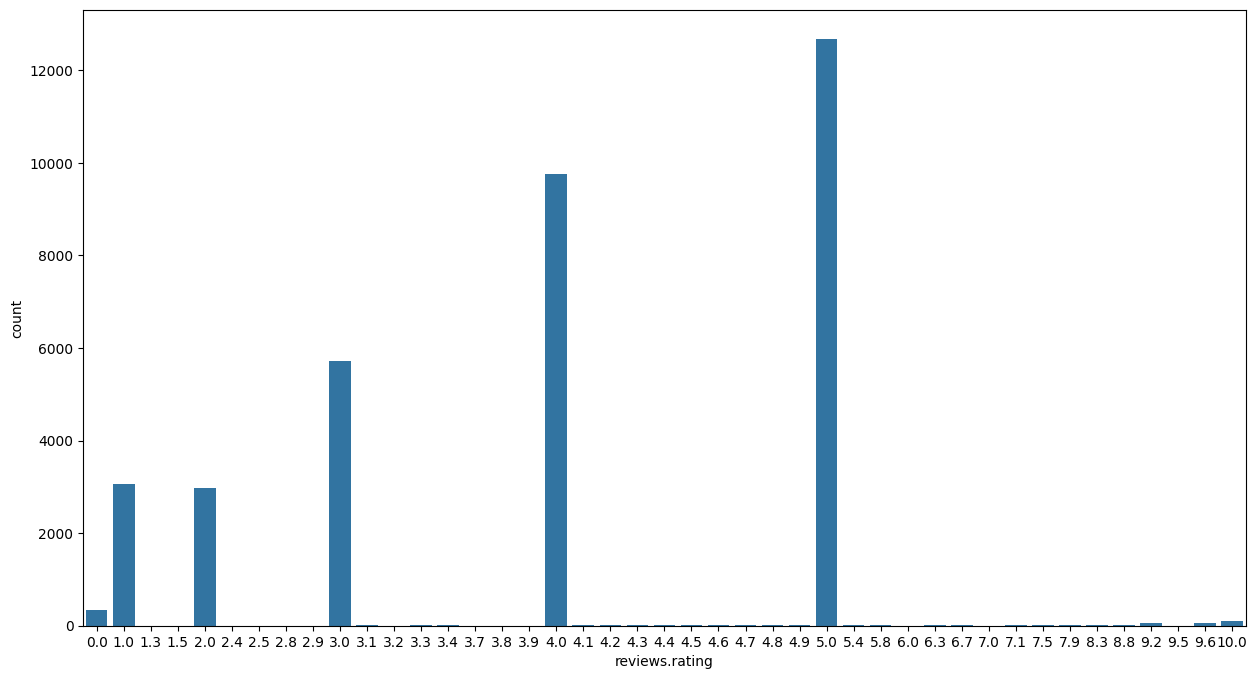

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(bar)
plt.show()

In [ ]:
df['reviews.rating'].describe()


count    35045.000000
mean         3.776855
std          1.415721
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         10.000000
Name: reviews.rating, dtype: float64

In [ ]:
average_scores = df.groupby('name')['reviews.rating'].mean().reset_index()
average_scores

name  reviews.rating
0                                        1785 Inn        2.625000
1                                      1900 House        4.571429
2                              40 Berkeley Hostel        3.329193
3                  A Bed & Breakfast In Cambridge        3.574074
4                          A Swallow's Nest Motel        0.000000
..                                            ...             ...
869                          Wisconsin-aire Motel        4.285714
870          Worldwide Hospitality Supply Company        0.000000
871         Wyndham Resort At Fairfield Mountains        3.928571
872  Wyndham Vacation Resorts Towers On The Grove        4.050000
873                                    Yakima Inn        1.000000

[874 rows x 2 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

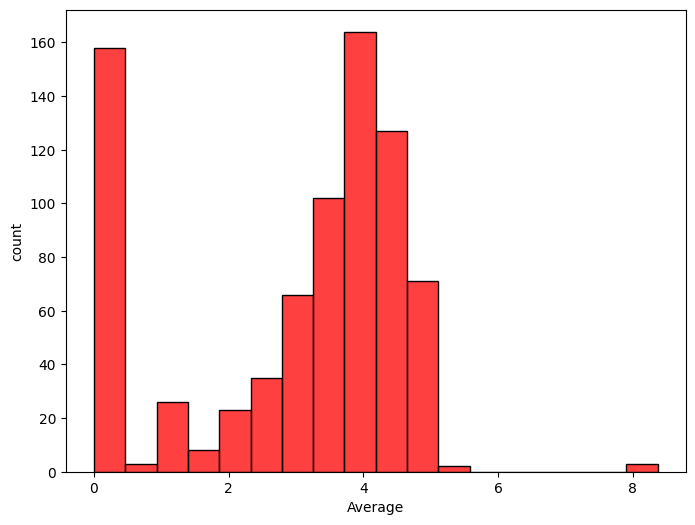

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(average_scores['reviews.rating'], color= 'red')
plt.xlabel('Average')
plt.ylabel('count')
plt.show

In [ ]:
average_scores.describe()

reviews.rating
count      788.000000
mean         2.949776
std          1.731525
min          0.000000
25%          1.988636
50%          3.607893
75%          4.188835
max          8.368932

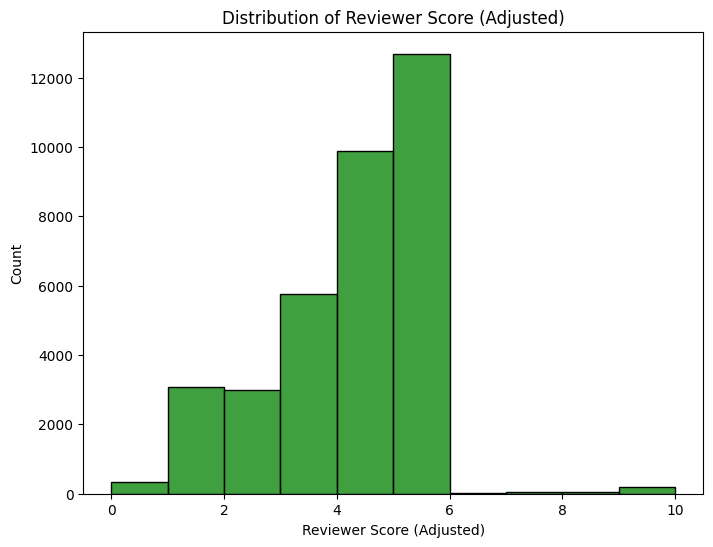

In [ ]:
plt.figure(figsize=(8, 6))  # Set figure size
sns.histplot(df['reviews.rating'], color='green', bins=10, kde=False)

plt.xlabel('Reviewer Score (Adjusted)')
plt.ylabel('Count')
plt.title('Distribution of Reviewer Score (Adjusted)')

plt.show()

In [ ]:
df['reviews.rating'].value_counts()

reviews.rating
5.0     12671
4.0      9754
3.0      5708
1.0      3068
2.0      2979
0.0       333
10.0      101
9.6        53
9.2        49
4.3        26
4.8        25
8.3        25
8.8        24
7.5        24
7.9        24
4.2        22
3.4        17
6.3        14
4.1        14
4.5        13
7.1        13
6.7        12
5.4         9
4.6         7
3.1         7
3.3         6
4.7         6
4.4         6
4.9         6
5.8         6
2.4         4
3.8         3
2.5         3
3.9         2
3.2         2
3.7         2
7.0         1
6.0         1
2.9         1
2.8         1
1.5         1
1.3         1
9.5         1
Name: count, dtype: int64

In [ ]:
df['country'].value_counts()

country
US    35907
Name: count, dtype: int64

In [ ]:
df['city'].value_counts().head(10)

city
Alexandria        1185
Virginia Beach     787
Newburgh           714
San Antonio        701
New York           535
Biloxi             392
New Orleans        380
Erie               357
Seattle            353
Waterville         335
Name: count, dtype: int64

In [ ]:
top_cities_df = df[df['city'].isin(top_cities.index)]  # Filter the original dataset for top 10 cities
top_cities_df

address    categories         city country  latitude  \
468          375 Main St  Hotels,Hotel   Waterville      US  44.57059   
469          375 Main St  Hotels,Hotel   Waterville      US  44.57059   
470          375 Main St  Hotels,Hotel   Waterville      US  44.57059   
471          375 Main St  Hotels,Hotel   Waterville      US  44.57059   
472          375 Main St  Hotels,Hotel   Waterville      US  44.57059   
...                  ...           ...          ...     ...       ...   
29584  621 Esplanade Ave        Hotels  New Orleans      US  29.96322   
29585  621 Esplanade Ave        Hotels  New Orleans      US  29.96322   
29586  621 Esplanade Ave        Hotels  New Orleans      US  29.96322   
29587  621 Esplanade Ave        Hotels  New Orleans      US  29.96322   
29588  621 Esplanade Ave        Hotels  New Orleans      US  29.96322   

       longitude                                      name postalCode  \
468   -69.640120  Best Western Plus Waterville Grand Hotel       4901   
469   -69.640120  Best Western Plus Waterville Grand Hotel       4901   
470   -69.640120  Best Western Plus Waterville Grand Hotel       4901   
471   -69.640120  Best Western Plus Waterville Grand Hotel       4901   
472   -69.640120  Best Western Plus Waterville Grand Hotel       4901   
...          ...                                       ...        ...   
29584 -90.059329                             Lamothe House      70116   
29585 -90.059329                             Lamothe House      70116   
29586 -90.059329                             Lamothe House      70116   
29587 -90.059329                             Lamothe House      70116   
29588 -90.059329                             Lamothe House      70116   

      province reviews.date   reviews.dateAdded  reviews.doRecommend  \
468         ME   2015-06-17 2016-10-27 13:17:27                  NaN   
469         ME   2015-11-23 2016-10-27 13:17:27                  NaN   
470         ME   2015-08-03 2016-10-27 13:17:27                  NaN   
471         ME   2012-08-13 2016-10-27 13:17:27                  NaN   
472         ME   2013-10-10 2016-10-27 13:17:27                  NaN   
...        ...          ...                 ...                  ...   
29584       LA   2016-09-24 2017-04-11 16:37:55                  NaN   
29585       LA   2016-08-29 2017-04-11 16:37:55                  NaN   
29586       LA   2013-11-23 2017-04-11 16:37:55                  NaN   
29587       LA   2016-08-21 2017-04-11 16:37:55                  NaN   
29588       LA   2013-11-23 2017-04-11 16:37:55                  NaN   

       reviews.id  reviews.rating  \
468           NaN             4.0   
469           NaN             5.0   
470           NaN             3.0   
471           NaN             3.0   
472           NaN             4.0   
...           ...             ...   
29584         NaN             2.0   
29585         NaN             4.0   
29586         NaN             4.0   
29587         NaN             4.0   
29588         NaN             4.0   

                                            reviews.text  \
468    I asked for a nonsmoking room and was pleased ...   
469    I always stay at this hotel when visiting my m...   
470                Adequate but nothing to recommend it.   
471    We stayed one night on a family visit to my da...   
472    Great service, comfortable hotel. Rug was wet ...   
...                                                  ...   
29584  The history of this hotel is awesome and was s...   
29585  We were in town in August. The hotel is at the...   
29586  209 has a private deck and a view of the garde...   
29587           Great time easy access to bourbon street   
29588  209 has a private deck and a view of the garde...   

                                       reviews.title reviews.userCity  \
468                           Better than I expected              NaN   
469    Easy access to interstate 95 yet still quite.              NaN   
470     Perfe

<ipython-input-85-aff1cff6278d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='city', y='reviews.rating', data=top_cities_df, palette='viridis',


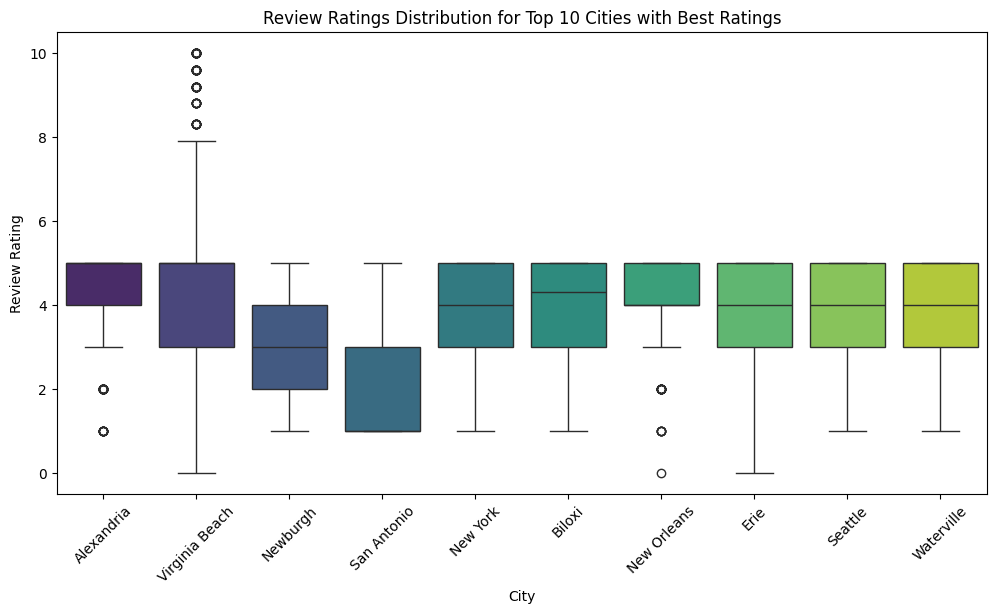

In [ ]:
top_cities_df = df[df['city'].isin(top_cities.index)]


plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='reviews.rating', data=top_cities_df, palette='viridis',
            order=top_cities.index)


plt.xlabel('City')
plt.ylabel('Review Rating')
plt.title('Review Ratings Distribution for Top 10 Cities with Best Ratings')
plt.xticks(rotation=45)


plt.show()

In [ ]:
df['name'].value_counts()

name
The Alexandrian, Autograph Collection                    1185
Howard Johnson Inn - Newburgh                             714
Americas Best Value Inn                                   567
Fiesta Inn and Suites                                     546
Ip Casino Resort Spa                                      392
                                                         ... 
Extended Stay America - Los Angeles - Ontario Airport       1
Days Inn Marion                                             1
Hampton Inn & Suites Douglas                                1
Sids Resort                                                 1
Towneplace Suites                                           1
Name: count, Length: 874, dtype: int64

In [ ]:
df['name'].describe()


count                                     35907
unique                                      874
top       The Alexandrian, Autograph Collection
freq                                       1185
Name: name, dtype: object

In [ ]:
top_hotels_df = df.sort_values(by='reviews.rating', ascending=False).head(10)
top_hotels_df = top_hotels_df[['name','reviews.rating']]

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)

print(top_hotels_df)

                                                           name  reviews.rating
9794                                         Pelican Shores Inn            10.0
9873                                         Pelican Shores Inn            10.0
30745                      Candlewood Suites Eugene Springfield            10.0
9854                                         Pelican Shores Inn            10.0
9858                                         Pelican Shores Inn            10.0
28717  Holiday Inn Express Hotel and Suites Va Beach Oceanfront            10.0
4487                                    Hyatt Regency Kathmandu            10.0
9798                                         Pelican Shores Inn            10.0
9868                                         Pelican Shores Inn            10.0
9869                                         Pelican Shores Inn            10.0


In [1]:
pip install folium

   ---------------------------------------- 0.0/108.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.9 kB ? eta -:--:--
   ----------- --------------------------- 30.7/108.9 kB 435.7 kB/s eta 0:00:01
   -------------- ------------------------ 41.0/108.9 kB 279.3 kB/s eta 0:00:01
   ----------------------------- --------- 81.9/108.9 kB 416.7 kB/s eta 0:00:01
   ----------------------------- --------- 81.9/108.9 kB 416.7 kB/s eta 0:00:01
   ----------------------------- --------- 81.9/108.9 kB 416.7 kB/s eta 0:00:01
   -------------------------------------- 108.9/108.9 kB 299.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/133.3 kB ? eta -:--:--
   --------------------- ------------------ 71.7/133.3 kB 4.1 MB/s eta 0:00:01
   --------------------- ------------------ 71.7/133.3 kB 4.1 MB/s eta 0:00:01
   -------------------------------------  133.1/133.3 kB 983.0 kB/s eta 0:00:01
   -------------------------------------- 133.3/133.3 kB 788.7 kB/s 


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import folium

In [11]:
pip install plotly pandas


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: plotly in c:\users\dell\appdata\local\programs\python\python311\lib\site-packages (5.24.1)




[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import plotly.express as px

# Read your dataset (replace with your actual file path)
df = pd.read_csv('path_to_your_file.csv')

# Check the first few rows to ensure column names
print(df.head())

# Create the map visualization
fig = px.scatter_mapbox(df, 
                        lat="latitude",   # Column for latitude
                        lon="longitude",  # Column for longitude
                        hover_name="name",  # Column for hotel name (use 'name' instead of 'hotel_name')
                        color="name",  # Optionally color by hotel name (if you have different hotels)
                        zoom=3,  # Set zoom level
                        height=600)

# Update the layout (choose a map style)
fig.update_layout(mapbox_style="carto-positron",  # You can change the style
                  title="Hotel Locations",  # Title for the map
                  showlegend=False)  # Disable legend if not needed

# Show the map
fig.show()

                  address categories      city country   latitude  longitude  \
0  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
1  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
2  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
3  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
4  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   

                 name postalCode province          reviews.date  \
0  Hotel Russo Palace      30126       GA  2013-09-22T00:00:00Z   
1  Hotel Russo Palace      30126       GA  2015-04-03T00:00:00Z   
2  Hotel Russo Palace      30126       GA  2014-05-13T00:00:00Z   
3  Hotel Russo Palace      30126       GA  2013-10-27T00:00:00Z   
4  Hotel Russo Palace      30126       GA  2015-03-05T00:00:00Z   

      reviews.dateAdded  reviews.doRecommend  reviews.id  reviews.rating  \
0  2016-10-24T00:00:25Z                 

In [39]:
pip install --upgrade plotly


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
pip install nbformat --upgrade


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import plotly.express as px


# Ensure the columns 'latitude' and 'longitude' are numeric and check for missing values
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# Remove rows with missing latitude or longitude values
df = df.dropna(subset=['latitude', 'longitude'])

# Create the map visualization
fig = px.scatter_mapbox(df, 
                        lat="latitude",   # Column for latitude
                        lon="longitude",  # Column for longitude
                        hover_name="name",  # Column for hotel name
                        color="name",  # Optionally color by hotel name
                        zoom=3,  # Set zoom level
                        height=600)

# Update the layout with open-street-map style (no Mapbox token required)
fig.update_layout(mapbox_style="open-street-map",  # Use free Mapbox style
                  title="Hotel Locations",  # Title for the map
                  showlegend=False)  # Disable legend if not needed

# Show the map
fig.show()

In [13]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Set the renderer to display in the Jupyter Notebook cell

# Ensure 'latitude' and 'longitude' are numeric
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# Remove rows with missing latitude or longitude
df = df.dropna(subset=['latitude', 'longitude'])

# Create the map visualization
fig = px.scatter_mapbox(df,
                        lat="latitude",
                        lon="longitude",
                        hover_name="name",
                        color="name",
                        zoom=3,
                        height=600)

# Update the map layout
fig.update_layout(mapbox_style="open-street-map",
                  title="Hotel Locations",
                  showlegend=False)

# Show the map in the notebook
fig.show()



In [15]:
pip install wordcloud

     ---------------------------------------- 0.0/167.9 kB ? eta -:--:--
     -- ------------------------------------- 10.2/167.9 kB ? eta -:--:--
     ------ ------------------------------ 30.7/167.9 kB 435.7 kB/s eta 0:00:01
     ------------- ----------------------- 61.4/167.9 kB 469.7 kB/s eta 0:00:01
     -------------------- ---------------- 92.2/167.9 kB 525.1 kB/s eta 0:00:01
     ------------------------------ ----- 143.4/167.9 kB 655.8 kB/s eta 0:00:01
     ------------------------------------ 167.9/167.9 kB 673.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   ------------------- -------------------- 143.4/299.9 kB 1.2 MB/s eta 0:00:01
   ------------------- -------------------- 143.4/299.9 kB 1.2 MB/s eta 0:00:01
   ---------------------- --------------- 174.1/299.9 kB 700.2 kB/s eta 0:00:0


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


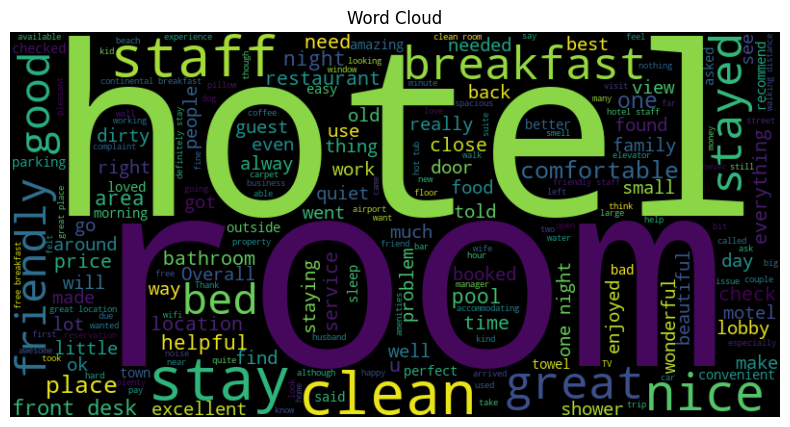

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure your DataFrame is loaded and 'reviews.text' column exists
text_data = ' '.join(df['reviews.text'].dropna().astype(str))

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide axes
plt.title('Word Cloud')
plt.show()
